In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet

In [13]:
import mlflow

In [2]:
import pandas as pd
import numpy as np

In [3]:
def fetch_data():
    csv_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
    return pd.read_csv(csv_url, sep=";")

In [4]:
data_df = fetch_data()

In [5]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<AxesSubplot:>

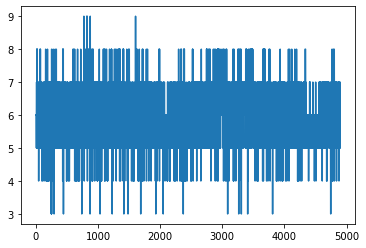

In [8]:
data_df["quality"].plot()

In [9]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [10]:
eval_metrics(data_df, data_df)

(0.0, 0.0, 1.0)

In [20]:
def train_model(data, alpha=0.5, l1_ratio=0.5):

    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]

    lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
    lr.fit(train_x, train_y)

    predicted_qualities = lr.predict(test_x)
    rmse, mae, r2 = eval_metrics(test_y, predicted_qualities)

    # Print out metrics
    print(f"ElasticNet model (alpha={alpha}, l1_ratio={l1_ratio}):")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R2: {r2}")

    data["predict quality"] = lr.predict((data.drop(["quality"], axis=1))
)
    return data

In [21]:
data_out_df = train_model(data=data_df)

ElasticNet model (alpha=0.5, l1_ratio=0.5):
  RMSE: 0.8255524263928932
  MAE: 0.629394050507588
  R2: 0.1165942766605208


In [24]:
data_out_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predict quality,diff
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,5.651223,0.348777
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,5.610878,0.389122
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,5.962917,0.037083
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,5.711865,0.288135
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,5.711865,0.288135


In [23]:
data_out_df["diff"] = data_out_df["quality"] - data_out_df["predict quality"]

<AxesSubplot:>

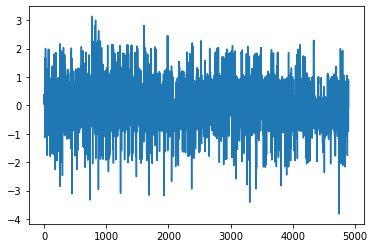

In [25]:
data_out_df["diff"].plot()

In [14]:
def train_model_mf(data, mlflow_experiment_id, alpha=0.5, l1_ratio=0.5, tracking_uri="http://127.0.0.1:5000"):
    mlflow.set_tracking_uri(tracking_uri)

    train, test = train_test_split(data)

    # The predicted column is "quality" which is a scalar from [3, 9]
    train_x = train.drop(["quality"], axis=1)
    test_x = test.drop(["quality"], axis=1)
    train_y = train[["quality"]]
    test_y = test[["quality"]]
    
    with mlflow.start_run(experiment_id=mlflow_experiment_id):
        lr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
        lr.fit(train_x, train_y)
        predicted_qualities = lr.predict(test_x)
        (rmse, mae, r2) = eval_metrics(test_y, predicted_qualities)

        print(f"ElasticNet model (alpha={alpha}, l1_ratio={l1_ratio}):")
        print(f"  RMSE: {rmse}")
        print(f"  MAE: {mae}")
        print(f"  R2: {r2}")

        mlflow.log_param("alpha", alpha)
        mlflow.log_param("l1_ratio", l1_ratio)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2", r2)
        mlflow.log_metric("mae", mae)

        mlflow.sklearn.log_model(lr, "model")

In [17]:
train_model_mf(data=data_df, mlflow_experiment_id=1, alpha=0.3, l1_ratio=0.3)
train_model_mf(data=data_df, mlflow_experiment_id=1, alpha=0.5, l1_ratio=0.5)

ElasticNet model (alpha=0.3, l1_ratio=0.3):
  RMSE: 0.7784270851505246
  MAE: 0.6084775527264742
  R2: 0.19969493915808112
ElasticNet model (alpha=0.5, l1_ratio=0.5):
  RMSE: 0.8219894994668474
  MAE: 0.6343625448622529
  R2: 0.12518537518838524
